INSTALLATIONS


In [ ]:
!pip install -q google_play_scraper

In [ ]:
!pip install -q transformers #sentiment
!pip install -q plotly-express #data visualization

In [ ]:
!pip install gensim
!pip install spacy


In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
!pip install pyyaml==5.4.1

BEGINNING OF THE CODE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import string
import re
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

## KFC EGYPT

In [ ]:
kfc_projectegy = reviews_all('com.kfc.egypt', sleep_milliseconds= 0, lang = 'en', country = 'US', sort = Sort.NEWEST)

In [ ]:
df_egy = pd.json_normalize(kfc_projectegy)

In [ ]:
df_egy.head(1000)

reviewId           userName  \
0    77e94e5a-450f-428f-8505-137784857115     Infamous Token   
1    71e17e1e-2436-4a42-83af-ab62eddecfe0        Karim Maher   
2    db25cf24-c003-4c99-8788-5ba81cbe1305         Ruqia Adly   
3    9d9a353a-559f-4d5b-a1c1-1bd513caf589          Aya Salem   
4    4d1204e5-c0fe-4fda-91f6-f5a57df3b379    Mohamed A.Hamza   
..                                    ...                ...   
393  5d9615f1-7526-42b4-b09d-98310f33ffbd        Rayan Tamer   
394  fbdd7897-9515-4b8a-aff9-410fa1b2a036  Dr.Mohamed Refaat   
395  962eabb2-2eb0-4ed0-baf3-f06b742d2c91        ahmed halim   
396  b3d96dad-745f-4914-8bf4-08b93338fe35   Agamemnon Atreus   
397  96297664-4354-42fb-a764-c1b05c76da08      Mahmoud Ayman   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a/ACg8oc...   
1    https://play-lh.googleusercontent.com/a-/ALV-U...   
2    https://play-lh.googleusercontent.com/a/ACg8oc...   
3    https://play-lh.googleusercontent.com/a-/ALV-U...   
4    https://play-lh.googleusercontent.com/a-/ALV-U...   
..                                                 ...   
393  https://play-lh.googleusercontent.com/a-/ALV-U...   
394  https://play-lh.googleusercontent.com/a-/ALV-U...   
395  https://play-lh.googleusercontent.com/a-/ALV-U...   
396  https://play-lh.googleusercontent.com/a-/ALV-U...   
397  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                               content  score  thumbsUpCount  \
0    This app is just too bad at everything. From a...      1            304   
1    I like the digital experience and focus on det...      1            544   
2    I've had the worst experience I was ordering a...      1            301   
3    The app doesn't send the otp code to verify my...      1            395   
4    Application is useless. Each order is done the...      1            181   
..                                                 ...    ...            ...   
393                      It's great the app works fast      5              0   
394                                 Easy and effective      5              0   
395  When i choose to pay it give me problem everyt...      1              4   
396                           Nice and friendly to use      5              0   
397  So far so good Not enough offers but can't com...      5              1   

    reviewCreatedVersion                  at replyContent repliedAt appVersion  
0                   None 2023-11-13 15:47:31         None      None       None  
1                  5.8.5 2021-07-28 22:39:09         None      None      5.8.5  
2                  8.4.5 2023-12-28 18:39:13         None      None      8.4.5  
3                  5.8.5 2021-08-13 18:42:50         None      None      5.8.5  
4                 6.15.5 2022-12-10 03:37:58         None      None     6.15.5  
..                   ...                 ...          ...       ...        ...  
393                7.9.5 2023-06-20 14:09:39         None      None      7.9.5  
394               6.15.5 2022-11-25 17:20:31         None      None     6.15.5  
395               5.14.5 2021-11-04 13:10:30         None      None     5.14.5  
396                8.4.5 2023-12-03 14:55:28         None      None      8.4.5  
397                7.9.5 2023-04-22 15:05:59         None      None      7.9.5  

[398 rows x 11 columns]

In [ ]:
df_egy.isnull().sum()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion     61
at                        0
replyContent            398
repliedAt               398
appVersion               61
dtype: int64

In [ ]:
df_egy['score'].mean()

2.806532663316583

<ipython-input-13-ad961636a9b8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'score', data = df_egy, palette = 'deep')


<Axes: xlabel='score', ylabel='count'>

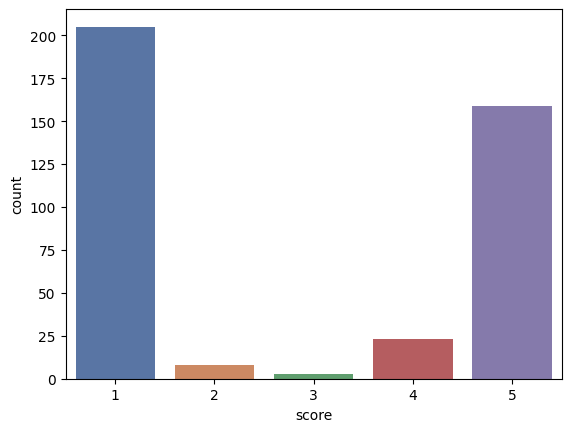

In [ ]:
sns.countplot(x = 'score', data = df_egy, palette = 'deep')

In [ ]:
df_egy['reviewCreatedVersion'].value_counts()

reviewCreatedVersion
5.14.5    107
4.0.0      86
7.20.5     40
5.8.5      35
6.15.5     28
8.4.5      21
7.9.5      17
5.7.5       2
5.13.5      1
Name: count, dtype: int64

In [ ]:
df_egy['Sentiment'] = df_egy['score'].apply(lambda rating : 'neutral' if rating == 3 else 'positive' if rating > 3 else 'negative')

<Axes: xlabel='Sentiment', ylabel='count'>

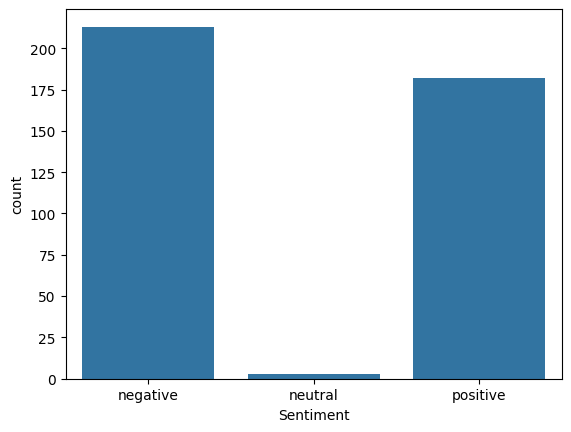

In [ ]:
sns.countplot(x = 'Sentiment', data = df_egy)

In [ ]:
neutral_reviews_index = df_egy[df_egy['Sentiment']=='neutral'].index

df_egy = df_egy.drop(neutral_reviews_index)

df_egy['Sentiment'].unique()

array(['negative', 'positive'], dtype=object)

Sentiment Analysis Download

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:

df_egy1 = df_egy[['content', 'Sentiment']].copy()
df_egy1

content Sentiment
0    This app is just too bad at everything. From a...  negative
1    I like the digital experience and focus on det...  negative
2    I've had the worst experience I was ordering a...  negative
3    The app doesn't send the otp code to verify my...  negative
4    Application is useless. Each order is done the...  negative
..                                                 ...       ...
393                      It's great the app works fast  positive
394                                 Easy and effective  positive
395  When i choose to pay it give me problem everyt...  negative
396                           Nice and friendly to use  positive
397  So far so good Not enough offers but can't com...  positive

[395 rows x 2 columns]

In [ ]:
df_egy1.dtypes

content      object
Sentiment    object
dtype: object

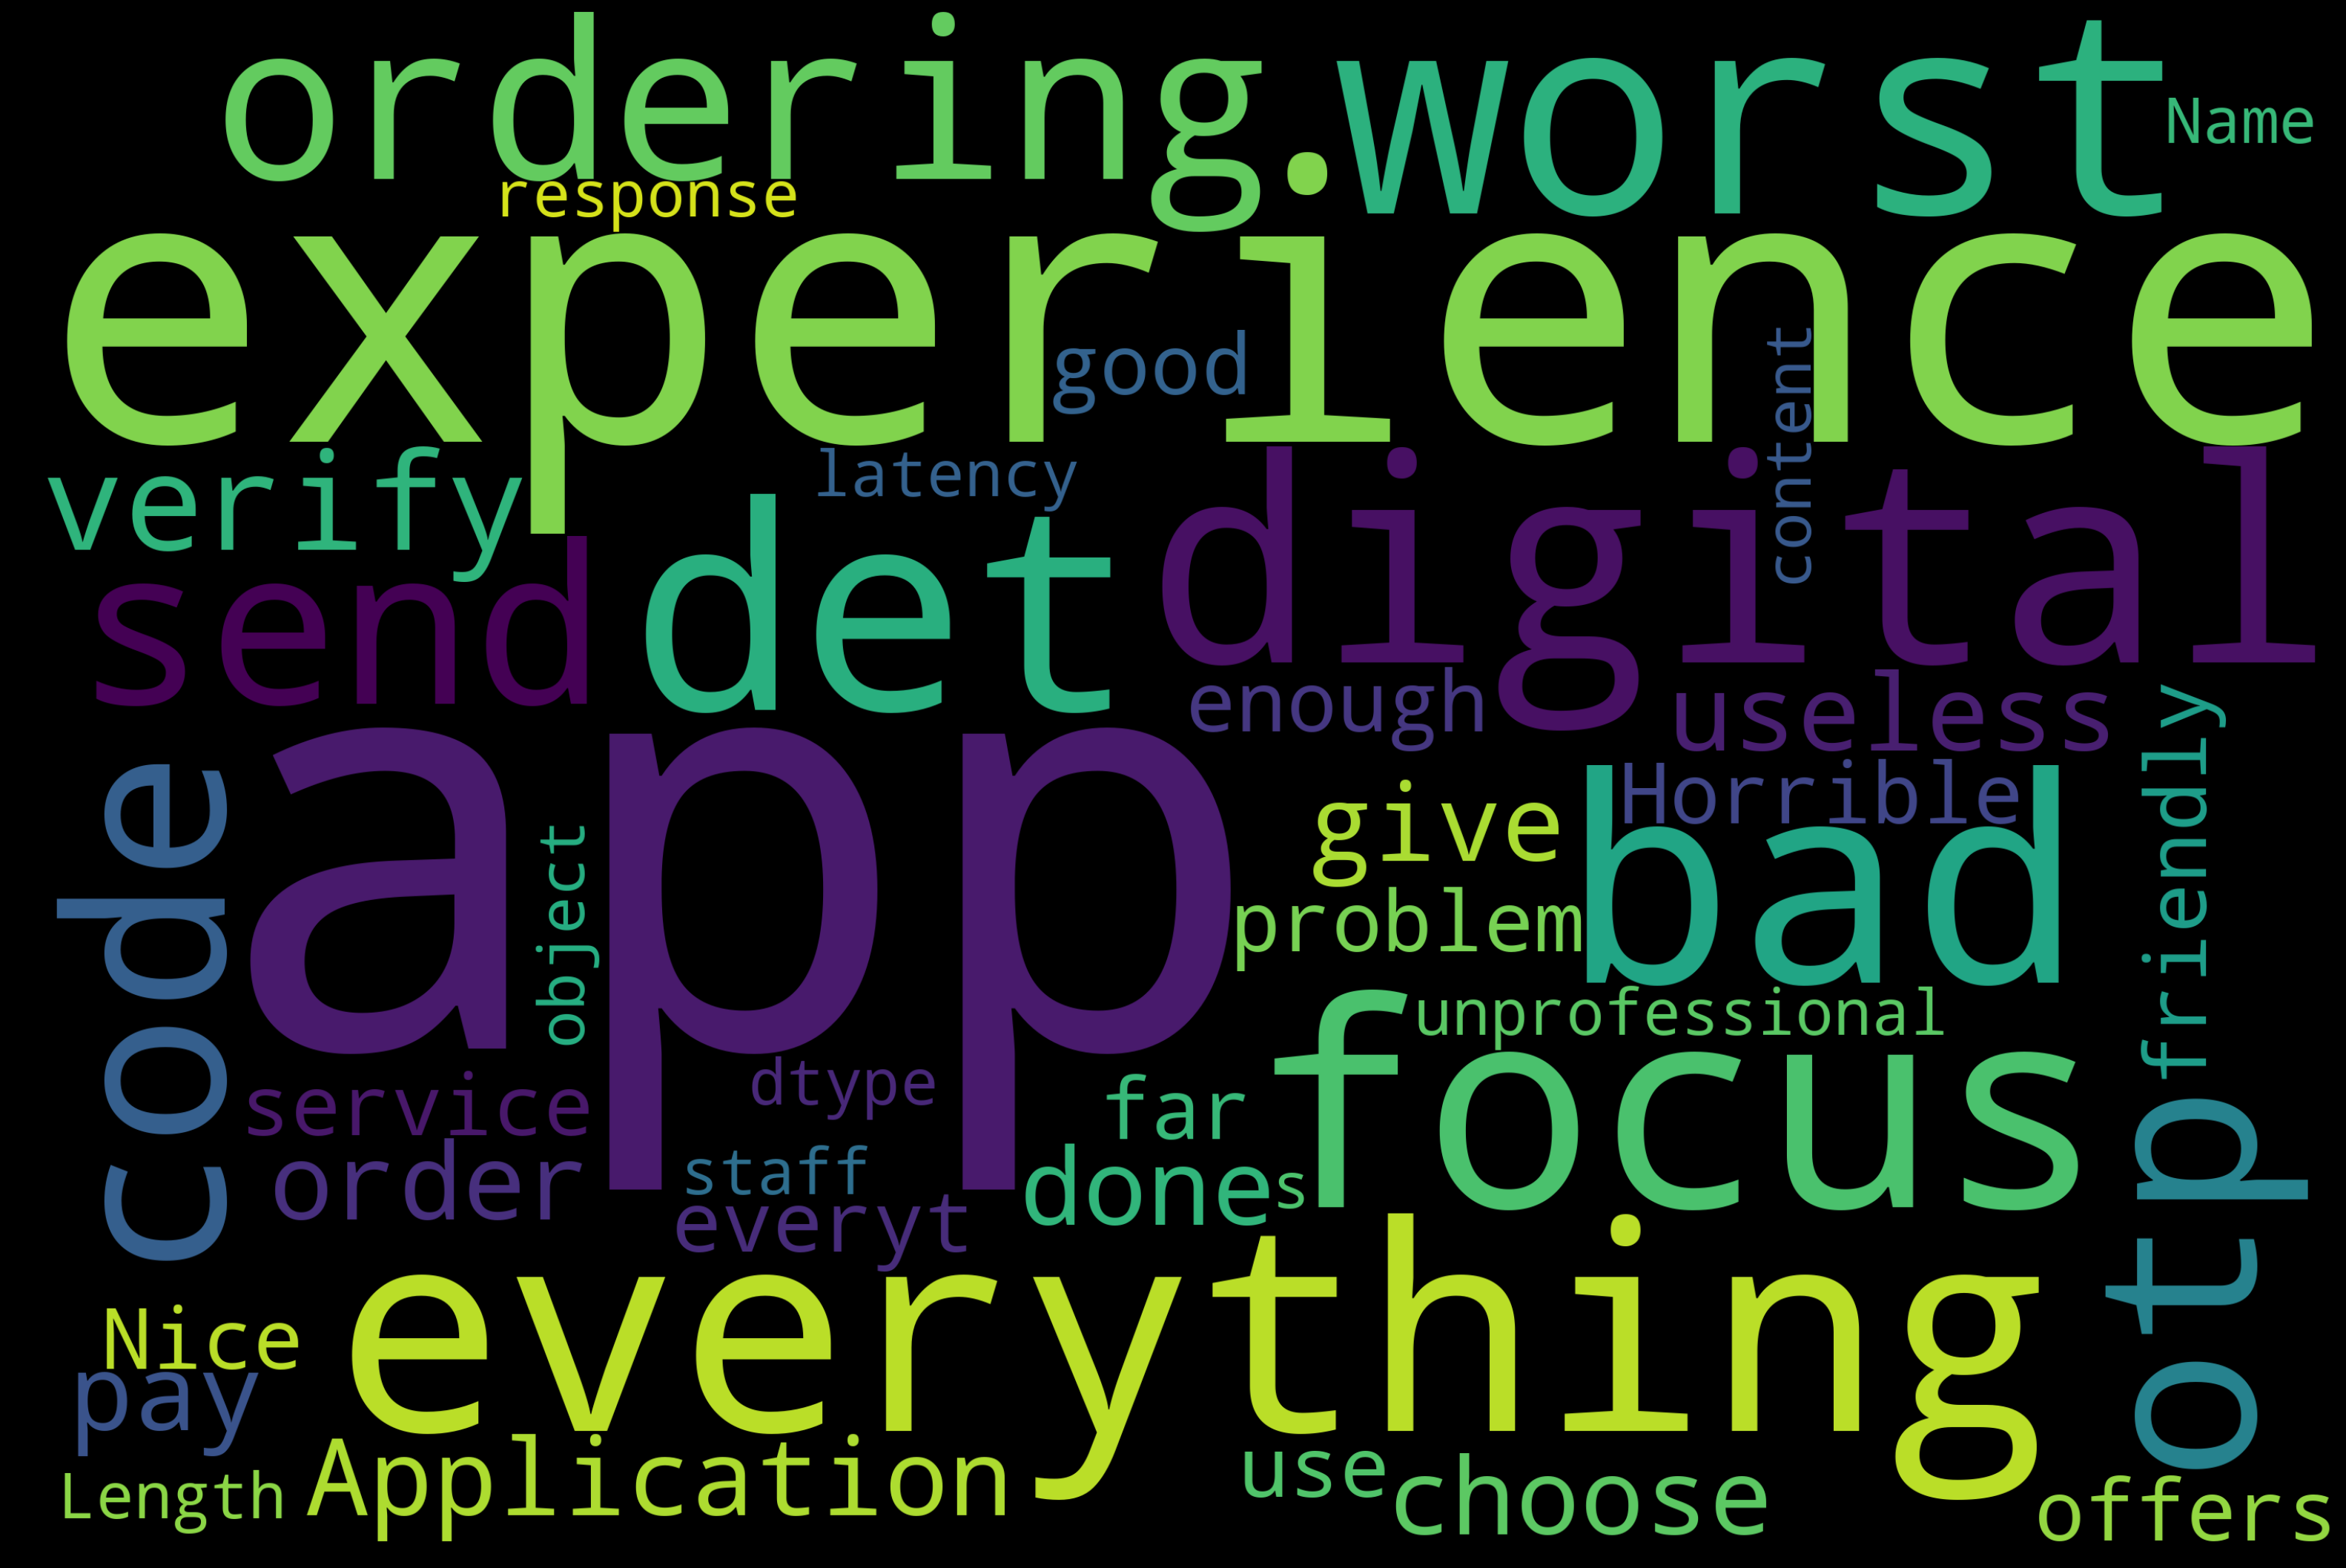

In [ ]:
!pip install wordcloud
# import wordcloud as wc

text = df_egy1["content"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

Removing HTML tags

In [ ]:
from bs4 import BeautifulSoup
!pip install lxml
df_egy1['content'] = df_egy1['content'].apply(lambda review : BeautifulSoup(review, "lxml").text)

df_egy1['content']

<ipython-input-21-b5fcea23fc3f>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_egy1['content'] = df_egy1['content'].apply(lambda review : BeautifulSoup(review, "lxml").text)


0      This app is just too bad at everything. From a...
1      I like the digital experience and focus on det...
2      I've had the worst experience I was ordering a...
3      The app doesn't send the otp code to verify my...
4      Application is useless. Each order is done the...
                             ...                        
393                        It's great the app works fast
394                                   Easy and effective
395    When i choose to pay it give me problem everyt...
396                             Nice and friendly to use
397    So far so good Not enough offers but can't com...
Name: content, Length: 395, dtype: object

In [ ]:
df_egy1['content'] = df_egy['content'].astype('str')

In [ ]:
#df_egy['result'] = df_egy['content'].apply(lambda x : sentiment_analysis(x))

In [ ]:
#df_egy['sentiment'] = df_egy['result'].apply(lambda x : (x[0]['label']))

In [ ]:
df_egy.head()

reviewId         userName  \
0  77e94e5a-450f-428f-8505-137784857115   Infamous Token   
1  71e17e1e-2436-4a42-83af-ab62eddecfe0      Karim Maher   
2  db25cf24-c003-4c99-8788-5ba81cbe1305       Ruqia Adly   
3  9d9a353a-559f-4d5b-a1c1-1bd513caf589        Aya Salem   
4  4d1204e5-c0fe-4fda-91f6-f5a57df3b379  Mohamed A.Hamza   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  This app is just too bad at everything. From a...      1            304   
1  I like the digital experience and focus on det...      1            544   
2  I've had the worst experience I was ordering a...      1            301   
3  The app doesn't send the otp code to verify my...      1            395   
4  Application is useless. Each order is done the...      1            181   

  reviewCreatedVersion                  at replyContent repliedAt appVersion  \
0                 None 2023-11-13 15:47:31         None      None       None   
1                5.8.5 2021-07-28 22:39:09         None      None      5.8.5   
2                8.4.5 2023-12-28 18:39:13         None      None      8.4.5   
3                5.8.5 2021-08-13 18:42:50         None      None      5.8.5   
4               6.15.5 2022-12-10 03:37:58         None      None     6.15.5   

  Sentiment  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative

In [ ]:
# import re

df_egy1['content'] = df_egy1['content'].apply(lambda review : re.sub(r"[0-9]", " ", review.lower()))
df_egy1['content']

0      this app is just too bad at everything. from a...
1      i like the digital experience and focus on det...
2      i've had the worst experience i was ordering a...
3      the app doesn't send the otp code to verify my...
4      application is useless. each order is done the...
                             ...                        
393                        it's great the app works fast
394                                   easy and effective
395    when i choose to pay it give me problem everyt...
396                             nice and friendly to use
397    so far so good not enough offers but can't com...
Name: content, Length: 395, dtype: object

Tokenizing

In [ ]:
!pip install nltk
import nltk
from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df_egy1['content'] = df_egy1['content'].apply(lambda review: tokenizer.tokenize(review))
df_egy1['content']

0      [this, app, is, just, too, bad, at, everything...
1      [i, like, the, digital, experience, and, focus...
2      [i, 've, had, the, worst, experience, i, was, ...
3      [the, app, does, n't, send, the, otp, code, to...
4      [application, is, useless., each, order, is, d...
                             ...                        
393               [it, 's, great, the, app, works, fast]
394                               [easy, and, effective]
395    [when, i, choose, to, pay, it, give, me, probl...
396                       [nice, and, friendly, to, use]
397    [so, far, so, good, not, enough, offers, but, ...
Name: content, Length: 395, dtype: object

Remove Stopwords

In [ ]:
#ALl English stopwords

!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
np.unique(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o',
       'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours',
       'ourselves', 'out', 'over', 'own', 're', 's', 'same

In [ ]:
negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
np.unique(stop_words)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'now', 'o', 'of', 'off', 'on',
       'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out',
       'over', 'own', 're', 's', 'same', 'shan', "shan't",

In [ ]:
# Remove stopwords from each review
df_egy1['content'] = df_egy1['content'].apply(lambda review: [word for word in review if word not in stop_words])

# Flatten the list of words in each review
all_words = [word for review in df_egy1['content'] for word in review]

# Get unique words
unique_words = np.unique(all_words)

print(unique_words)

['!' '%' '&' ... '🤢🤢🤢🤢🤢' '🤩🤩🤩😍😍😍😘😘😘' '🤮🤮🤮']


Remove puncuations

In [ ]:
# removing puncuations, and removing any dots, dashes, or empty strings

import string

df_egy1['content'] = df_egy1['content'].apply(lambda review : list(filter(None,[word for word in review if word not in string.punctuation])))

np.unique(df_egy1['content'])

array([list(["'m", 'building', 'away', 'branch', 'cancelled', 'order', 'told', 'zone', 'reordered', 'manager', 'call', 'rudely', 'ask', 'call', 'center', 'agent', 'cancel', 'order', 'even', 'without', 'apologizing']),
       list(["'s", 'amazing', 'app', 'easy', 'use', "'m", 'waiting', 'orders']),
       list(["'s", 'bad', 'interface', 'not', 'good', "n't", 'prefer', 'anymore']),
       list(["'s", 'bad', 'wrong', 'miss', 'items', 'store', "n't", 'clean']),
       list(["'s", 'good', 'customer', 'service', 'perfect', 'food', 'tastes', 'delicious', 'really', 'like']),
       list(["'s", 'great', "'d", 'better', 'delivery', 'faster', 'overall', "'s", 'amazing']),
       list(["'s", 'great', 'app', 'works', 'fast']),
       list(["'s", 'pretty', 'easy', 'app', 'u', 'open', 'u', 'find', 'kfc', 'menu', 'listed', 'organized', 'categories..', 'loved']),
       list(["'s", 'purpose', 'ordering', "'re", 'gon', 'na', 'cancel', 'it.', 'useless', 'waste', 'time']),
       list(["'s", 'super', 'sup

In [ ]:
#Replace multiple characters with a single space in each string
df_egy1['content'] = df_egy1['content'].apply(lambda review: list(filter(None,[re.sub(r"[-._'`*]+", '', word) for word in review])))

# Removing single Characters
df_egy1['content'] = df_egy1['content'].apply(lambda review : list(filter(None,[word for word in review if len(word)>1])))


# Print the result
np.unique(df_egy1['content'])

array([list(['absolutely', 'wonderful', 'truly', 'words', 'say', 'good', 'recommended']),
       list(['absurd', 'price', 'increases', 'last', 'period', 'around', 'items', 'delivery']),
       list(['add', 'two', 'items', 'desserts', 'apple', 'pie', 'gone', 'add', 'spicy', 'potato', 'try', 'give', 'every', 'week', 'promo', 'code']),
       list(['address', 'updated', 'app', 'current', 'location', 'system', 'another', 'address', 'complaint', 'team', 'technical', 'support', 'nt', 'try', 'help', 'not', 'satisfied', 'handling', 'way', 'bad', 'experience']),
       list(['adore', 'kfc', 'always', 'best', 'really', 'different', 'taste', 'restaurant', '🤩🤩🤩😍😍😍😘😘😘']),
       list(['advanced', 'app']),
       list(['al', 'coupones', 'not', 'working', 'suck', 'app']),
       list(['always', 'application', 'tells', 'something', 'went', 'wrong']),
       list(['always', 'error', 'messages', 'without', 'continuing', 'orders']),
       list(['always', 'popup', 'fake', 'coupon', 'code']),
       list(

Lemmetiation/Stemming

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_egy1['content'] = df_egy1['content'].apply(lambda review: [lemmatizer.lemmatize(word) for word in review])
np.unique(df_egy1['content'])

[nltk_data] Downloading package wordnet to /root/nltk_data...


array([list(['absolutely', 'wonderful', 'truly', 'word', 'say', 'good', 'recommended']),
       list(['absurd', 'price', 'increase', 'last', 'period', 'around', 'item', 'delivery']),
       list(['add', 'two', 'item', 'dessert', 'apple', 'pie', 'gone', 'add', 'spicy', 'potato', 'try', 'give', 'every', 'week', 'promo', 'code']),
       list(['address', 'updated', 'app', 'current', 'location', 'system', 'another', 'address', 'complaint', 'team', 'technical', 'support', 'nt', 'try', 'help', 'not', 'satisfied', 'handling', 'way', 'bad', 'experience']),
       list(['adore', 'kfc', 'always', 'best', 'really', 'different', 'taste', 'restaurant', '🤩🤩🤩😍😍😍😘😘😘']),
       list(['advanced', 'app']),
       list(['al', 'coupones', 'not', 'working', 'suck', 'app']),
       list(['always', 'application', 'tell', 'something', 'went', 'wrong']),
       list(['always', 'error', 'message', 'without', 'continuing', 'order']),
       list(['always', 'popup', 'fake', 'coupon', 'code']),
       list(['always

In [ ]:
df_egy1.head()

content Sentiment
0  [app, bad, everything, security, standpoint, s...  negative
1  [like, digital, experience, focus, detail, eve...  negative
2  [ve, worst, experience, ordering, delivery, ne...  negative
3  [app, nt, send, otp, code, verify, num, hence,...  negative
4  [application, useless, order, done, call, time...  negative

Join lines together

In [ ]:
# each review will be represented as one string

df_egy1['content']= df_egy1['content'].apply(lambda x : " ".join(x))

In [ ]:
df_egy1['Sentiment'] = df_egy1['Sentiment'].astype('category').cat.codes

df_egy1['Sentiment']

0      0
1      0
2      0
3      0
4      0
      ..
393    1
394    1
395    0
396    1
397    1
Name: Sentiment, Length: 395, dtype: int8

In [ ]:
df_egy1['content']

0      app bad everything security standpoint share e...
1      like digital experience focus detail everythin...
2      ve worst experience ordering delivery new app ...
3      app nt send otp code verify num hence not orde...
4      application useless order done call time least...
                             ...                        
393                                  great app work fast
394                                       easy effective
395     choose pay give problem everytime bad experience
396                                    nice friendly use
397             far good not enough offer ca nt complain
Name: content, Length: 395, dtype: object

Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df_egy1['content'] #Independent Variable
y = df_egy1['Sentiment'] #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

good = x_train[y_train[y_train == 1].index]
bad = x_train[y_train[y_train == 0].index]

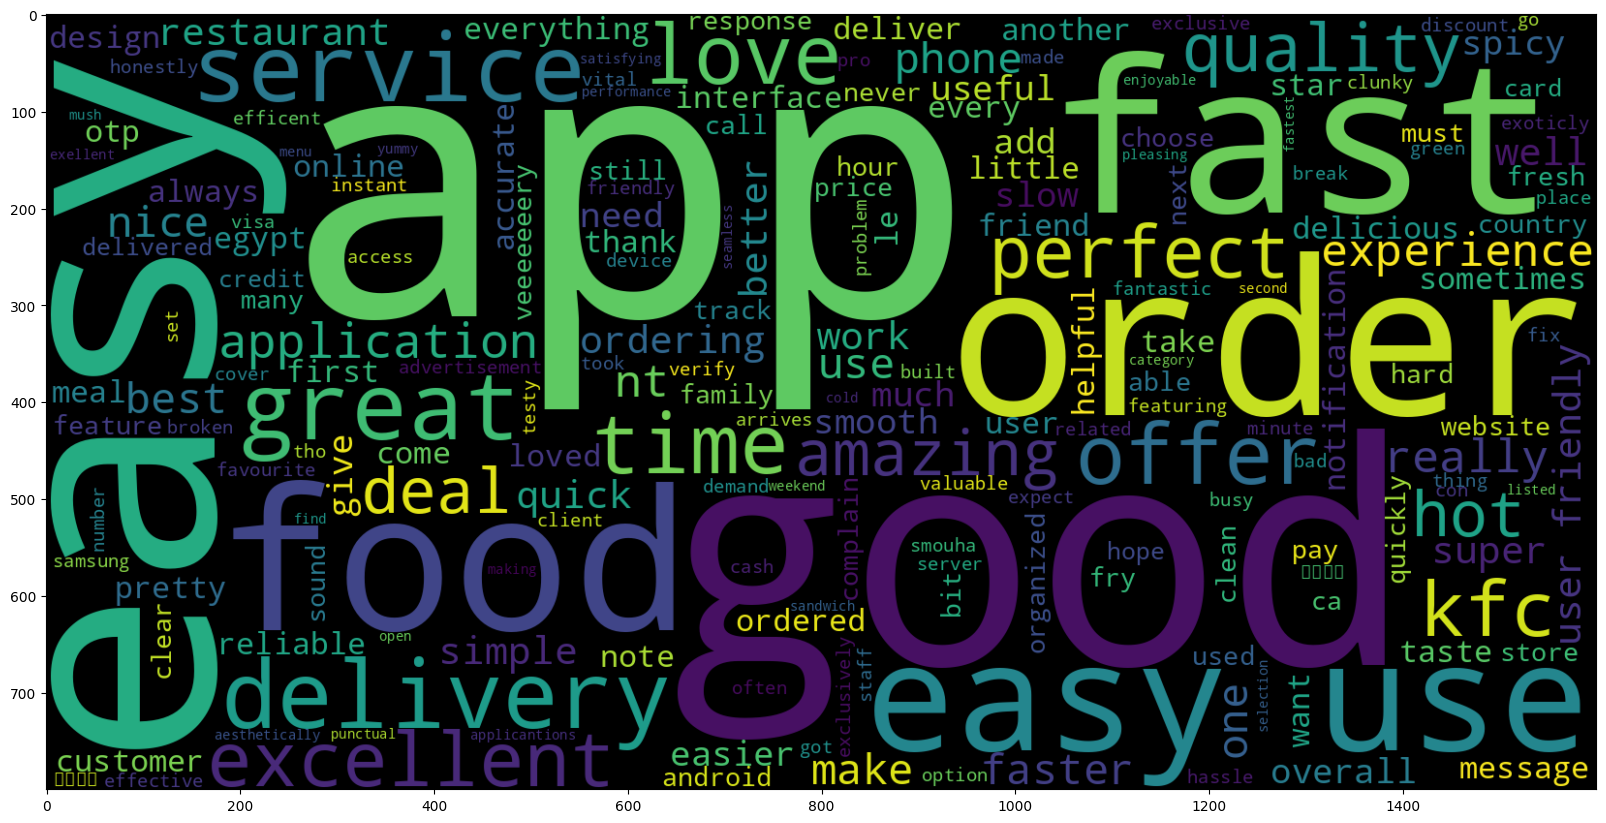

In [ ]:
plt.figure(figsize = (20,20)) # Reviews with Good Ratings

good_reviews = wc.WordCloud(min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(good))

plt.imshow(good_reviews,interpolation = 'bilinear')

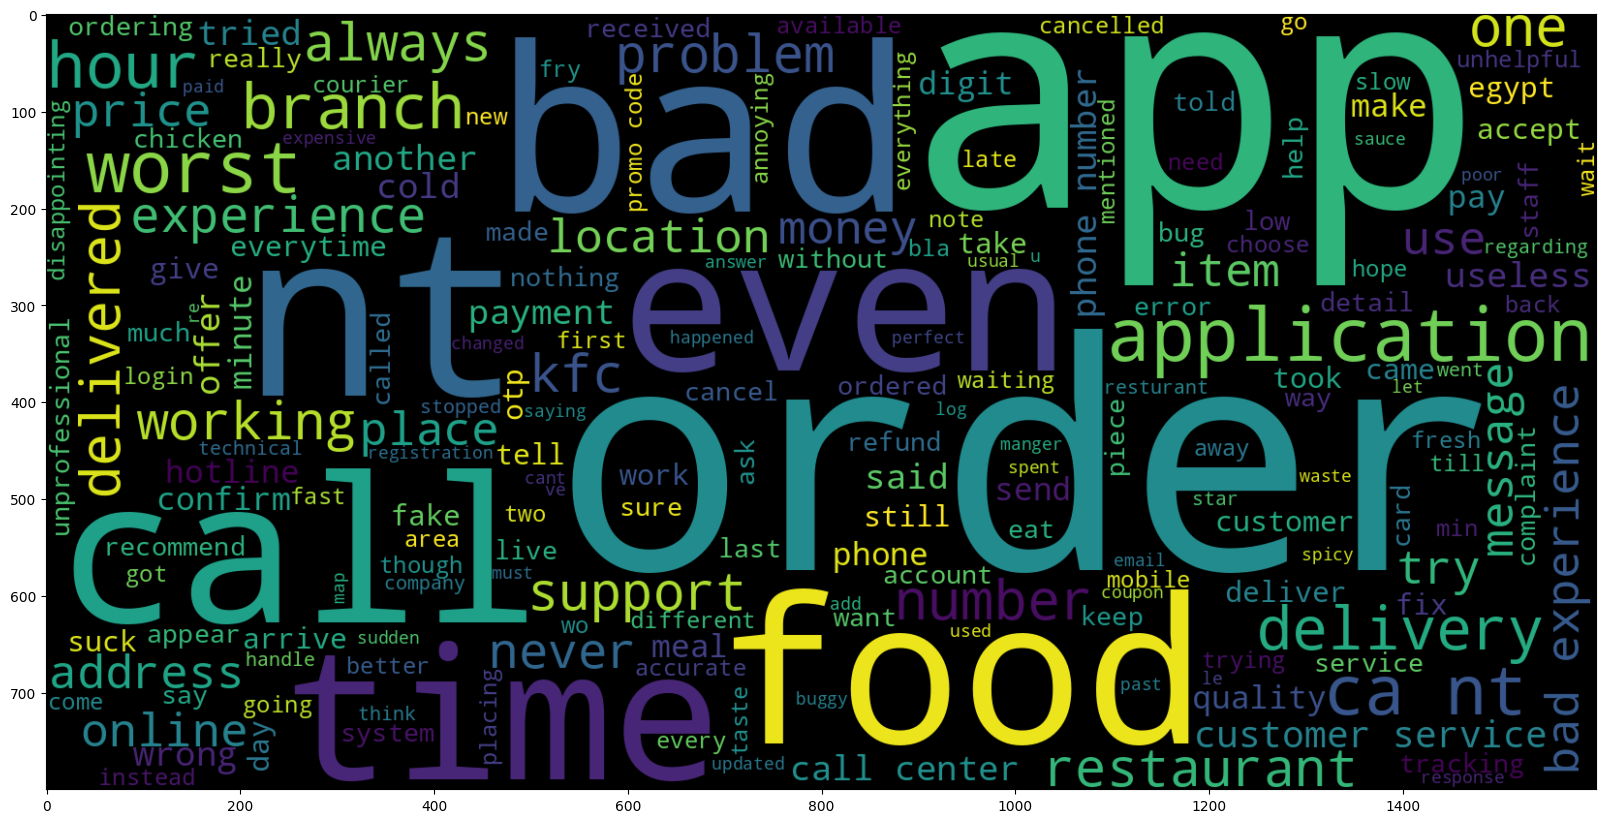

In [ ]:
plt.figure(figsize = (20,20)) # Reviews with Negative Ratings

negative_reviews = wc.WordCloud( min_font_size = 3 , width = 1600 , height = 800).generate(" ".join(bad))

plt.imshow(negative_reviews,interpolation = 'bilinear')

N-GRAMS COLLECTION

In [ ]:
from nltk import ngrams

n_grams_good = pd.Series(ngrams(" ".join(good).split(), 3)).value_counts()[:20]
n_grams_bad = pd.Series(ngrams(" ".join(bad).split(), 3)).value_counts()[:20]

Text(0.5, 0, 'No. of Occurances')

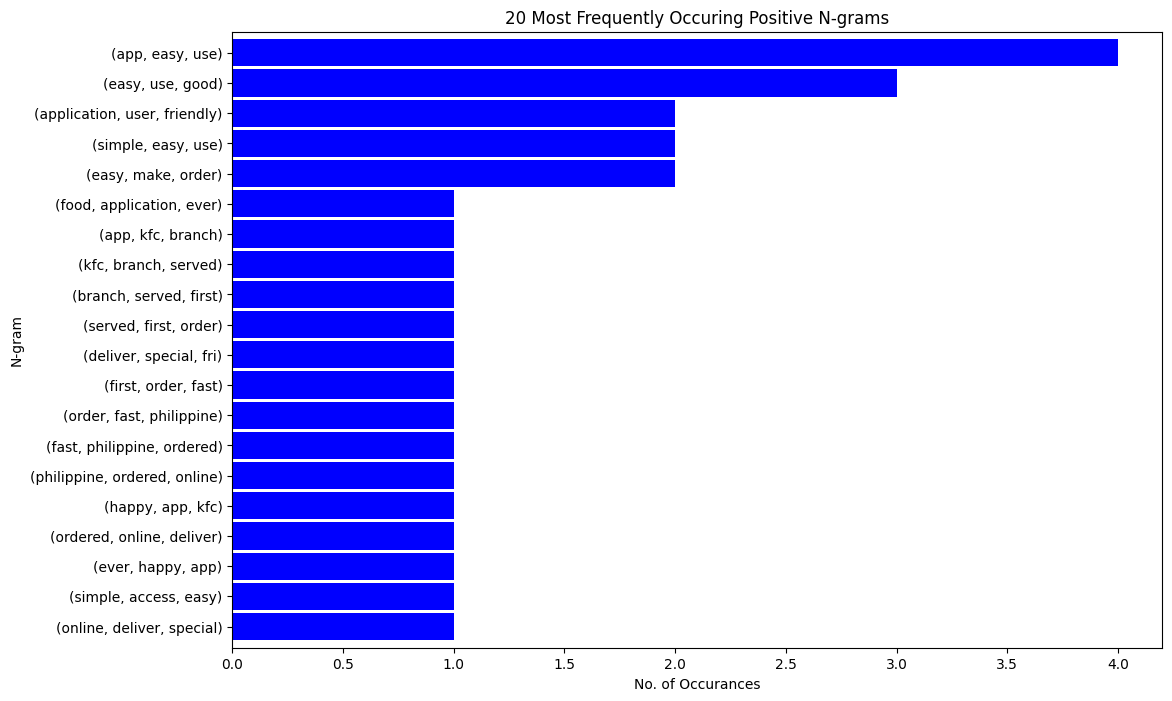

In [ ]:
n_grams_good.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Positive N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

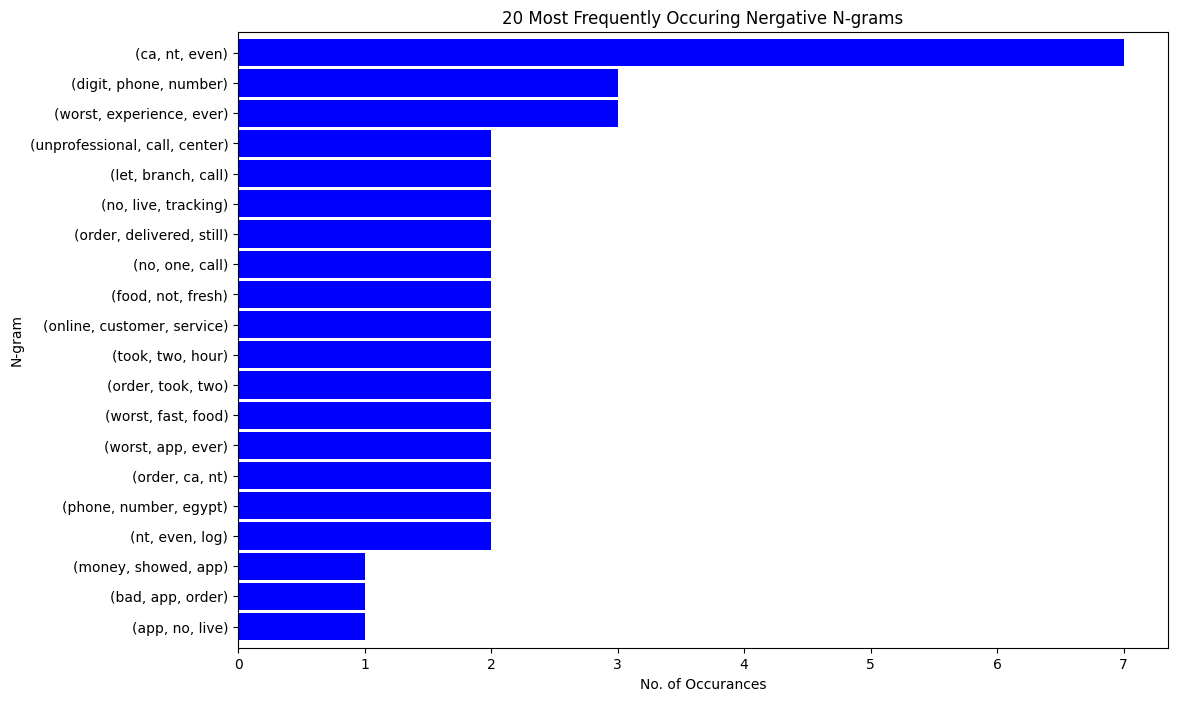

In [ ]:
n_grams_bad.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Nergative N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

Keyword extraction

In [ ]:
import collections

# Step 1: Calculate the frequency of each word in the entire dataset
word_frequency = collections.Counter([word for review in df_egy1['content'] for word in review.split()])

# Step 2: Sort the words based on their frequency
sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

# Step 3: Manually identify keywords related to each aspect
food_quality_keywords = {'delicious', 'tasty', 'flavorful', 'yummy', 'satisfying', 'bland', 'tasteless', 'horrible', 'amazing', 'great', 'fresh', 'quality', 'good', 'bad', 'good food', 'good quality', 'bad food', 'bad quality'}
service_keywords = {'fast', 'friendly', 'efficient', 'courteous', 'attentive', 'rude', 'slow', 'excellent', 'helpful', 'quick', 'professional', 'crash'}
ambiance_keywords = {'cozy', 'atmospheric', 'inviting', 'relaxing', 'welcoming', 'comfortable', 'clean', 'modern', 'pleasant', 'quiet', 'spacious'}
price_keywords = {'affordable', 'reasonable', 'value', 'budget-friendly', 'inexpensive', 'expensive', 'cheap', 'pricey', 'cost', 'economical', 'bad price', 'good price', 'good value', 'bad value'}

min_frequency = 1

# Step 4: Filter the most frequent words to obtain keywords related to each aspect
food_quality_keywords_freq = [(word, freq) for word, freq in sorted_words if word in food_quality_keywords and freq >= min_frequency]
service_keywords_freq = [(word, freq) for word, freq in sorted_words if word in service_keywords and freq >= min_frequency]
ambiance_keywords_freq = [(word, freq) for word, freq in sorted_words if word in ambiance_keywords and freq >= min_frequency]
price_keywords_freq = [(word, freq) for word, freq in sorted_words if word in price_keywords and freq >= min_frequency]

# Print the keywords for each aspect
print("Food Quality Keywords:")
print(food_quality_keywords_freq)
print("\nService Keywords:")
print(service_keywords_freq)
print("\nAmbiance Keywords:")
print(ambiance_keywords_freq)
print("\nPrice Keywords:")
print(price_keywords_freq)


Food Quality Keywords:
[('bad', 64), ('good', 42), ('great', 18), ('quality', 18), ('amazing', 16), ('fresh', 6), ('delicious', 6), ('horrible', 2), ('satisfying', 1), ('yummy', 1), ('tasty', 1)]

Service Keywords:
[('fast', 31), ('excellent', 14), ('friendly', 10), ('slow', 7), ('quick', 5), ('helpful', 4), ('crash', 2), ('efficient', 2), ('professional', 1)]

Ambiance Keywords:
[('clean', 3), ('quiet', 1)]

Price Keywords:
[('expensive', 4), ('cheap', 2), ('cost', 1), ('value', 1), ('affordable', 1)]


In [ ]:
import pandas as pd

# Assuming you have a DataFrame called df_egy containing the reviews
# And you have a list of keywords for each aspect
food_quality_keywords = ['delicious', 'tasty', 'flavorful', 'yummy', 'satisfying', 'bland', 'tasteless', 'horrible', 'amazing', 'great', 'fresh', 'quality', 'good']
service_keywords = ['fast', 'friendly', 'efficient', 'courteous', 'attentive', 'rude', 'slow', 'excellent', 'helpful', 'quick', 'professional']
ambiance_keywords = ['cozy', 'atmospheric', 'inviting', 'relaxing', 'welcoming', 'comfortable', 'clean', 'modern', 'pleasant', 'quiet', 'spacious']
price_keywords = ['affordable', 'reasonable', 'value', 'budget-friendly', 'inexpensive', 'expensive', 'cheap', 'pricey', 'cost', 'economical']

# Define a function to filter reviews based on keywords
def filter_reviews_by_keywords(df, keywords):
    filtered_reviews = df[df['content'].str.contains('|'.join(keywords), case=False)]
    return filtered_reviews

# Filter reviews for each aspect
food_quality_reviews = filter_reviews_by_keywords(df_egy, food_quality_keywords)
service_reviews = filter_reviews_by_keywords(df_egy, service_keywords)
ambiance_reviews = filter_reviews_by_keywords(df_egy, ambiance_keywords)
price_reviews = filter_reviews_by_keywords(df_egy, price_keywords)

# Print the filtered reviews
print("Food Quality Reviews:")
print(food_quality_reviews)
print("\nService Reviews:")
print(service_reviews)
print("\nAmbiance Reviews:")
print(ambiance_reviews)
print("\nPrice Reviews:")
print(price_reviews)


Food Quality Reviews:
                                 reviewId            userName  \
7    5d75b4a6-22f4-4b6c-b6ac-02e3671771ff          Maged Adel   
9    850fc0dd-d75e-4444-b71d-b7a94d4ced4a         Mina Ishake   
11   b40fa868-c3bf-4cdf-a80d-f4d1d66df6fc          Sami Edris   
12   17b73ba3-204c-417e-b591-28a63bb84f9c         Engy Yassin   
21   42ba1cbb-d8f9-49c1-b261-cb81fd3a3ccf        Eslam Refaat   
..                                    ...                 ...   
384  98d8915b-17c4-4a4e-8f96-1caa13e89c7b       Islam Basiony   
390  d7dfb9df-0fd3-43e7-af0e-e8944301e1b3  Abdalrahman Farouk   
391  3eae30e5-9496-4331-b3be-ca757a56cf4a         Islam Adawy   
393  5d9615f1-7526-42b4-b09d-98310f33ffbd         Rayan Tamer   
397  96297664-4354-42fb-a764-c1b05c76da08       Mahmoud Ayman   

                                             userImage  \
7    https://play-lh.googleusercontent.com/a-/ALV-U...   
9    https://play-lh.googleusercontent.com/a/ACg8oc...   
11   https://play-lh.go

         Aspect  Positive Sentiment  Negative Sentiment
0  Food Quality               0.500               0.500
1       Service               0.880               0.120
2      Ambiance               1.000               0.000
3         Price               0.375               0.625


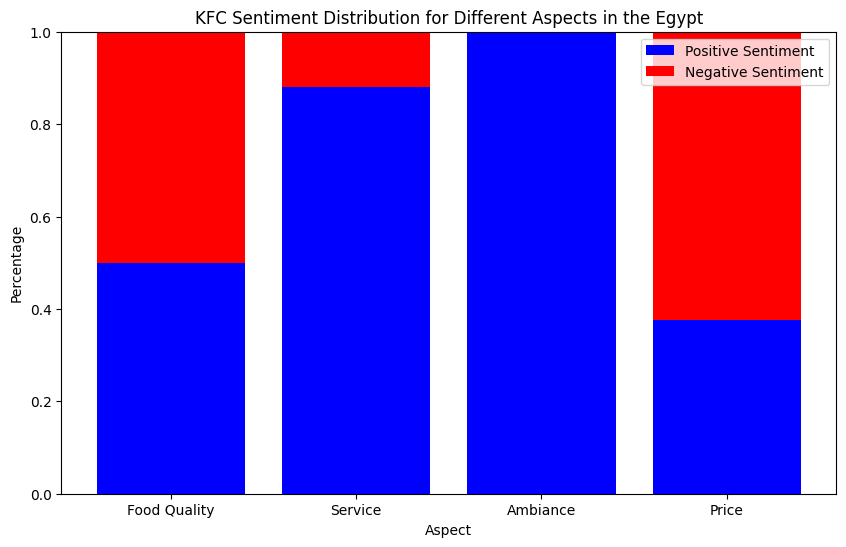

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Positive and negative sentiment words
positive_words = {'good', 'excellent', 'delicious', 'friendly', 'efficient', 'great', 'helpful', 'quick', 'fast', 'value', 'cheap', 'clean'}
negative_words = {'bad', 'horrible', 'tasteless', 'rude', 'slow', 'terrible', 'expensive', 'value', 'crash'}

# Function to calculate sentiment distribution for each aspect
def calculate_sentiment_distribution(keywords_freq, aspect):
    positive_sentiment = sum([freq for word, freq in keywords_freq if word in positive_words])
    negative_sentiment = sum([freq for word, freq in keywords_freq if word in negative_words])
    total = positive_sentiment + negative_sentiment

    if total == 0:
        return 0, 0

    positive_percentage = positive_sentiment / total
    negative_percentage = negative_sentiment / total
    return positive_percentage, negative_percentage

# Calculate sentiment distribution for each aspect
food_quality_positive, food_quality_negative = calculate_sentiment_distribution(food_quality_keywords_freq, 'Food Quality')
service_positive, service_negative = calculate_sentiment_distribution(service_keywords_freq, 'Service')
ambiance_positive, ambiance_negative = calculate_sentiment_distribution(ambiance_keywords_freq, 'Ambiance')
price_positive, price_negative = calculate_sentiment_distribution(price_keywords_freq, 'Price')

# Create a DataFrame to store the results
sentiment_df = pd.DataFrame({
    'Aspect': ['Food Quality', 'Service', 'Ambiance', 'Price'],
    'Positive Sentiment': [food_quality_positive, service_positive, ambiance_positive, price_positive],
    'Negative Sentiment': [food_quality_negative, service_negative, ambiance_negative, price_negative]
})

# Display the DataFrame
print(sentiment_df)

# Plot sentiment distribution for all aspects
plt.figure(figsize=(10, 6))
plt.bar(sentiment_df['Aspect'], sentiment_df['Positive Sentiment'], color='blue', label='Positive Sentiment')
plt.bar(sentiment_df['Aspect'], sentiment_df['Negative Sentiment'], color='red', bottom=sentiment_df['Positive Sentiment'], label='Negative Sentiment')
plt.xlabel('Aspect')
plt.ylabel('Percentage')
plt.title('KFC Sentiment Distribution for Different Aspects in the Egypt')
plt.legend()
plt.ylim(0, 1)
plt.show()


In [ ]:
# Calculate the total count of keywords
total_keywords_count = len(food_quality_keywords_freq) + len(service_keywords_freq) + len(ambiance_keywords_freq) + len(price_keywords_freq)

# Calculate the percentage of keywords for each aspect
food_quality_percentage = (len(food_quality_keywords_freq) / total_keywords_count) * 100
service_percentage = (len(service_keywords_freq) / total_keywords_count) * 100
ambiance_percentage = (len(ambiance_keywords_freq) / total_keywords_count) * 100
price_percentage = (len(price_keywords_freq) / total_keywords_count) * 100

# Print the percentage of keywords for each aspect
print("Food Quality Percentage:", food_quality_percentage, "%")
print("Service Percentage:", service_percentage, "%")
print("Ambiance Percentage:", ambiance_percentage, "%")
print("Price Percentage:", price_percentage, "%")


Food Quality Percentage: 40.74074074074074 %
Service Percentage: 33.33333333333333 %
Ambiance Percentage: 7.4074074074074066 %
Price Percentage: 18.51851851851852 %


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = df_egy1['content']  # Independent variable
y = df_egy1['Sentiment']  # Dependent variable

# Step 1: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 3: Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.957983193277311

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        70
           1       1.00      0.90      0.95        49

    accuracy                           0.96       119
   macro avg       0.97      0.95      0.96       119
weighted avg       0.96      0.96      0.96       119



In [ ]:
from sklearn.metrics import classification_report

clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

print("Result:")
print("===============================================")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Result:
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.933333   1.000000  0.957983    0.966667      0.960784
recall      1.000000   0.897959  0.957983    0.948980      0.957983
f1-score    0.965517   0.946237  0.957983    0.955877      0.957578
support    70.000000  49.000000  0.957983  119.000000    119.000000
_______________________________________________


NameError: name 'confusion_matrix' is not defined

## PIZZA HUT EGYPT

In [ ]:
ph_projectegy = reviews_all('com.ph.egypt', sleep_milliseconds= 0, lang = 'en', country = 'US', sort = Sort.MOST_RELEVANT)

In [ ]:
df_egy2 = pd.json_normalize(ph_projectegy)

In [ ]:
df_egy2.head(1000)

reviewId                     userName  \
0    2bf9afb0-745a-4e95-a086-92e3e0d3b651              volcano volcano   
1    0e60ea7d-69c0-45ff-a2bf-9106f64fbfaf            Ahmed El-Mosallam   
2    88a69fe2-b0d6-428a-8a28-73b2f8e05951              Ibrahim Ibrahim   
3    f39350db-0a29-4ec7-9dd9-58f60405fc8b             Ruqia Elshennawy   
4    54917681-1a60-475a-b74b-9e283b6c932b              Michael Mansour   
..                                    ...                          ...   
393  4a6b3fe6-c267-4306-b69f-42d917132cb7                ahmed mahmoud   
394  52506308-8bd1-4603-8e81-e789b29af5c1                  Radwa Fouad   
395  cd054be4-79b1-46f4-a51b-fc01fa890601                  saeed ahmed   
396  d392ce54-50f3-4ae9-aaa5-752259527685              Mahacen Mahmoud   
397  f448a7d0-17c1-446b-a8b5-053926f49eb2  Hassan Abdel Hamied Mostafa   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a/ACg8oc...   
1    https://play-lh.googleusercontent.com/a-/ALV-U...   
2    https://play-lh.googleusercontent.com/a/ACg8oc...   
3    https://play-lh.googleusercontent.com/a-/ALV-U...   
4    https://play-lh.googleusercontent.com/a-/ALV-U...   
..                                                 ...   
393  https://play-lh.googleusercontent.com/a-/ALV-U...   
394  https://play-lh.googleusercontent.com/a/ACg8oc...   
395  https://play-lh.googleusercontent.com/a/ACg8oc...   
396  https://play-lh.googleusercontent.com/a/ACg8oc...   
397  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                               content  score  thumbsUpCount  \
0    Bad value for money 2 Exclamation mark Very lo...      1             11   
1    Poorest food application ever, and they aren't...      1              4   
2    Simply awesome! Very easy to use. Very good UI...      5              5   
3    Bad value for money!! Very low quality pizza a...      1            128   
4    This app is the worst! My account doesn't work...      1             13   
..                                                 ...    ...            ...   
393                                 Amazing experience      5              0   
394                                         Best pizza      5              0   
395                                   Great experience      5              0   
396                                  Excellent service      5              0   
397                                        Exceptional      5              0   

    reviewCreatedVersion                  at replyContent repliedAt appVersion  
0                  7.0.2 2024-04-06 09:19:37         None      None      7.0.2  
1                  7.0.2 2024-04-13 07:52:50         None      None      7.0.2  
2                  7.0.2 2024-01-27 14:24:09         None      None      7.0.2  
3                  1.1.0 2021-08-02 16:47:39         None      None      1.1.0  
4                  7.0.2 2024-03-09 07:49:21         None      None      7.0.2  
..                   ...                 ...          ...       ...        ...  
393                2.1.2 2022-01-06 14:15:13         None      None      2.1.2  
394                2.1.2 2021-11-11 16:24:22         None      None      2.1.2  
395                2.1.2 2021-12-10 20:39:25         None      None      2.1.2  
396                2.1.2 2021-11-30 10:05:20         None      None      2.1.2  
397                2.1.2 2021-11-13 21:30:47         None      None      2.1.2  

[398 rows x 11 columns]

In [ ]:
df_egy2.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt                       object
appVersion                      object
dtype: object

In [ ]:
df_egy2['score'].mean()

3.6231155778894473

In [ ]:
df_egy2['content'] = df_egy2['content'].astype('str')

In [ ]:
#f_us['result'] = df_us['content'].apply(lambda x : sentiment_analysis(x))

<ipython-input-50-c44dab54f58d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'score', data = df_egy2, palette = 'deep')


<Axes: xlabel='score', ylabel='count'>

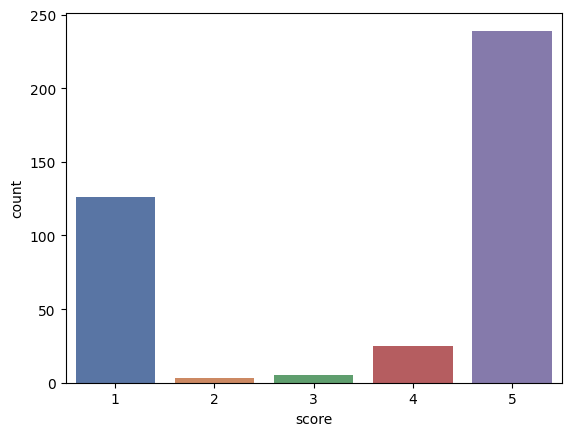

In [ ]:
sns.countplot(x = 'score', data = df_egy2, palette = 'deep')

In [ ]:
df_egy2['Sentiment'] = df_egy2['score'].apply(lambda rating : 'neutral' if rating == 3 else 'positive' if rating > 3 else 'negative')

<Axes: xlabel='Sentiment', ylabel='count'>

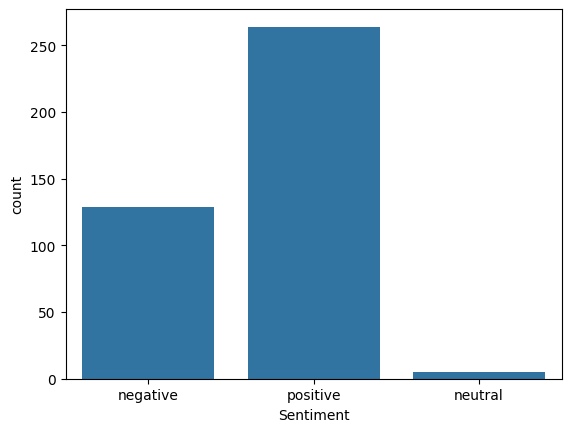

In [ ]:
sns.countplot(x = 'Sentiment', data = df_egy2)

In [ ]:
neutral_reviews_index = df_egy2[df_egy2['Sentiment']=='neutral'].index

df_egy2 = df_egy2.drop(neutral_reviews_index)

df_egy2['Sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
df_egy3 = df_egy2[['content', 'Sentiment']].copy()
df_egy3

content Sentiment
0    Bad value for money 2 Exclamation mark Very lo...  negative
1    Poorest food application ever, and they aren't...  negative
2    Simply awesome! Very easy to use. Very good UI...  positive
3    Bad value for money!! Very low quality pizza a...  negative
4    This app is the worst! My account doesn't work...  negative
..                                                 ...       ...
393                                 Amazing experience  positive
394                                         Best pizza  positive
395                                   Great experience  positive
396                                  Excellent service  positive
397                                        Exceptional  positive

[393 rows x 2 columns]

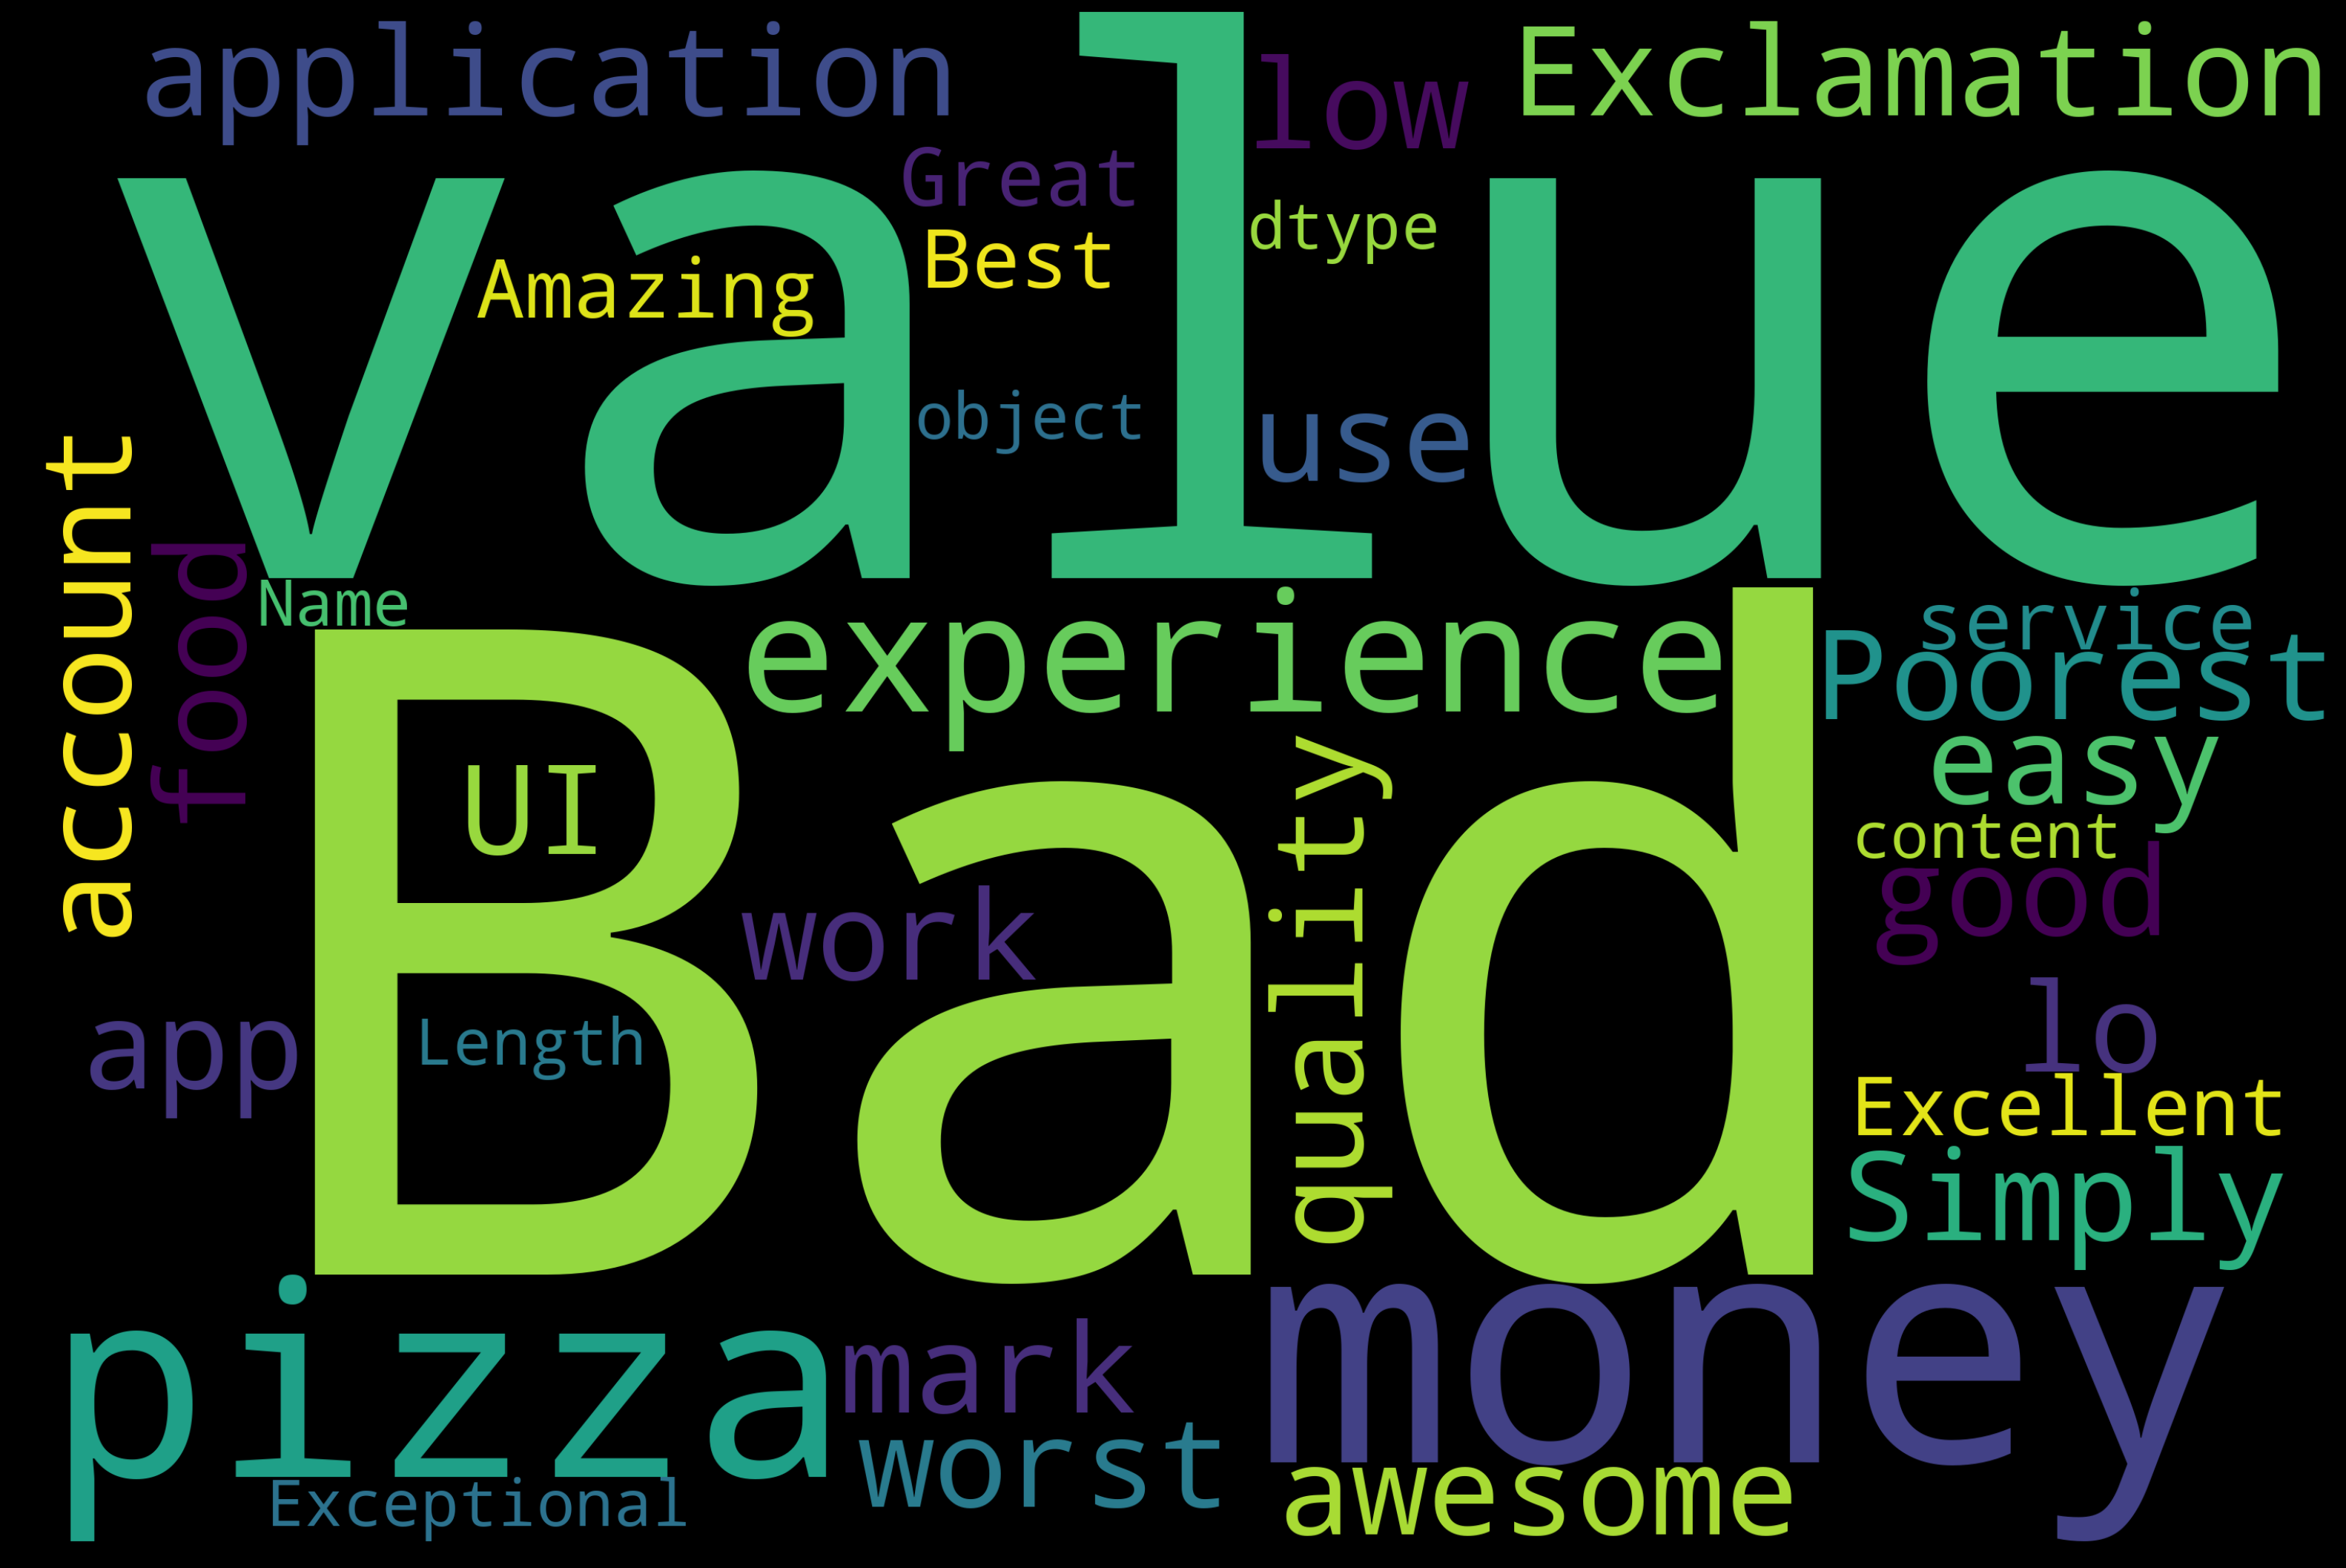

In [ ]:
#!pip install wordcloud
# import wordcloud as wc

text = df_egy3["content"]

wordcloud = wc.WordCloud(
    width = 3000,
    height = 2000,
    stopwords = wc.STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [ ]:
from bs4 import BeautifulSoup
!pip install lxml
df_egy3['content'] = df_egy3['content'].apply(lambda review : BeautifulSoup(review, "lxml").text)

df_egy3['content']

0      Bad value for money 2 Exclamation mark Very lo...
1      Poorest food application ever, and they aren't...
2      Simply awesome! Very easy to use. Very good UI...
3      Bad value for money!! Very low quality pizza a...
4      This app is the worst! My account doesn't work...
                             ...                        
393                                   Amazing experience
394                                           Best pizza
395                                     Great experience
396                                    Excellent service
397                                          Exceptional
Name: content, Length: 393, dtype: object

In [ ]:
#df_us['sentiment'] = df_us['result'].apply(lambda x : (x[0]['label']))

In [ ]:
!pip install nltk
import nltk
from nltk import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df_egy3['content'] = df_egy3['content'].apply(lambda review: tokenizer.tokenize(review))
df_egy3['content']

0      [Bad, value, for, money, 2, Exclamation, mark,...
1      [Poorest, food, application, ever, ,, and, the...
2      [Simply, awesome, !, Very, easy, to, use., Ver...
3      [Bad, value, for, money, !, !, Very, low, qual...
4      [This, app, is, the, worst, !, My, account, do...
                             ...                        
393                                [Amazing, experience]
394                                        [Best, pizza]
395                                  [Great, experience]
396                                 [Excellent, service]
397                                        [Exceptional]
Name: content, Length: 393, dtype: object

In [ ]:
#ALl English stopwords

!pip install --upgrade nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
np.unique(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o',
       'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours',
       'ourselves', 'out', 'over', 'own', 're', 's', 'same

In [ ]:
negation_list = ["no","nor", "not", "n't"]

stop_words = [word for word in stop_words if word not in negation_list]
np.unique(stop_words)

array(['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all',
       'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at',
       'be', 'because', 'been', 'before', 'being', 'below', 'between',
       'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did',
       'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don',
       "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further',
       'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven',
       "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him',
       'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn',
       "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma',
       'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't",
       'my', 'myself', 'needn', "needn't", 'now', 'o', 'of', 'off', 'on',
       'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out',
       'over', 'own', 're', 's', 'same', 'shan', "shan't",

In [ ]:
# Remove stopwords from each review
df_egy3['content'] = df_egy3['content'].apply(lambda review: [word for word in review if word not in stop_words])

# Flatten the list of words in each review
all_words = [word for review in df_egy3['content'] for word in review]

# Get unique words
unique_words = np.unique(all_words)

print(unique_words)

['!' '%' '&' ... '😫' '🙏😍👍' '🤬']


In [ ]:
# removing puncuations, and removing any dots, dashes, or empty strings

import string

df_egy3['content'] = df_egy3['content'].apply(lambda review : list(filter(None,[word for word in review if word not in string.punctuation])))

np.unique(df_egy3['content'])

array([list(['6', 'October', 'closed', 'better', 'company']),
       list(['A', 'food', 'delivery', 'app', "n't", 'tell', 'order', 'arriving', 'order', 'tracking', "n't", 'real', 'feature']),
       list(['Add', 'Sauces']),
       list(['Address', 'fields', 'need', 'efficient', 'need', 'add', 'boxes', 'write', 'exact', 'Address', 'details', 'special', 'marque', 'extra', 'details', 'I', 'call', 'hotline', 'add', 'information.', 'Also', 'need', 'add', 'estimated', 'time', 'delivery.', 'On', 'positive', 'note', 'food', 'came', 'fast', 'super', 'fresh.', 'Keep', 'good', 'work']),
       list(['Always', 'Excellent', 'Choice']),
       list(['Always', 'best', 'dinner', 'world', 'wide']),
       list(['Always', 'bugged', 'not', 'recommended']),
       list(['Always', 'easy', 'delicious']), list(['Amazing']),
       list(['Amazing', 'Service']), list(['Amazing', 'app']),
       list(['Amazing', 'app', '👏']),
       list(['Amazing', 'apppppppppp', 'I', 'could', 'order', 'pizza', 'India', 'Egypt

In [ ]:
#Replace multiple characters with a single space in each string
df_egy3['content'] = df_egy3['content'].apply(lambda review: list(filter(None,[re.sub(r"[-._'`*]+", '', word) for word in review])))

# Removing single Characters
df_egy3['content'] = df_egy3['content'].apply(lambda review : list(filter(None,[word for word in review if len(word)>1])))


# Print the result
np.unique(df_egy3['content'])

array([list(['Add', 'Sauces']),
       list(['Address', 'fields', 'need', 'efficient', 'need', 'add', 'boxes', 'write', 'exact', 'Address', 'details', 'special', 'marque', 'extra', 'details', 'call', 'hotline', 'add', 'information', 'Also', 'need', 'add', 'estimated', 'time', 'delivery', 'On', 'positive', 'note', 'food', 'came', 'fast', 'super', 'fresh', 'Keep', 'good', 'work']),
       list(['Always', 'Excellent', 'Choice']),
       list(['Always', 'best', 'dinner', 'world', 'wide']),
       list(['Always', 'bugged', 'not', 'recommended']),
       list(['Always', 'easy', 'delicious']), list(['Amazing']),
       list(['Amazing', 'Service']), list(['Amazing', 'app']),
       list(['Amazing', 'apppppppppp', 'could', 'order', 'pizza', 'India', 'Egypt']),
       list(['Amazing', 'experience']),
       list(['Amazing', 'offers', 'fast', 'delivery']),
       list(['Amazing', 'online', 'experience']),
       list(['Amazing', 'quality', 'fast', 'service']),
       list(['App', 'full', 'bugs', 

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df_egy3['content'] = df_egy3['content'].apply(lambda review: [lemmatizer.lemmatize(word) for word in review])
np.unique(df_egy3['content'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


array([list(['Add', 'Sauces']),
       list(['Address', 'field', 'need', 'efficient', 'need', 'add', 'box', 'write', 'exact', 'Address', 'detail', 'special', 'marque', 'extra', 'detail', 'call', 'hotline', 'add', 'information', 'Also', 'need', 'add', 'estimated', 'time', 'delivery', 'On', 'positive', 'note', 'food', 'came', 'fast', 'super', 'fresh', 'Keep', 'good', 'work']),
       list(['Always', 'Excellent', 'Choice']),
       list(['Always', 'best', 'dinner', 'world', 'wide']),
       list(['Always', 'bugged', 'not', 'recommended']),
       list(['Always', 'easy', 'delicious']), list(['Amazing']),
       list(['Amazing', 'Service']), list(['Amazing', 'app']),
       list(['Amazing', 'apppppppppp', 'could', 'order', 'pizza', 'India', 'Egypt']),
       list(['Amazing', 'experience']),
       list(['Amazing', 'offer', 'fast', 'delivery']),
       list(['Amazing', 'online', 'experience']),
       list(['Amazing', 'quality', 'fast', 'service']),
       list(['App', 'full', 'bug', 'slow',

In [ ]:
# each review will be represented as one string

df_egy3['content']= df_egy3['content'].apply(lambda x : " ".join(x))

In [ ]:
df_egy3['content']

0      Bad value money Exclamation mark Very low qual...
1      Poorest food application ever nt willing provi...
2      Simply awesome Very easy use Very good UI pizz...
3      Bad value money Very low quality pizza priced ...
4      This app worst My account nt work called custo...
                             ...                        
393                                   Amazing experience
394                                           Best pizza
395                                     Great experience
396                                    Excellent service
397                                          Exceptional
Name: content, Length: 393, dtype: object

In [ ]:
df_egy3['Sentiment'] = df_egy3['Sentiment'].astype('category').cat.codes

df_egy3['Sentiment']

0      0
1      0
2      1
3      0
4      0
      ..
393    1
394    1
395    1
396    1
397    1
Name: Sentiment, Length: 393, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split

X = df_egy3['content'] #Independent Variable
y = df_egy3['Sentiment'] #Dependent Variable

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

good = x_train[y_train[y_train == 1].index]
bad = x_train[y_train[y_train == 0].index]

In [ ]:
from nltk import ngrams

n_grams_good2 = pd.Series(ngrams(" ".join(good).split(), 3)).value_counts()[:20]
n_grams_bad2 = pd.Series(ngrams(" ".join(bad).split(), 3)).value_counts()[:20]

Text(0.5, 0, 'No. of Occurances')

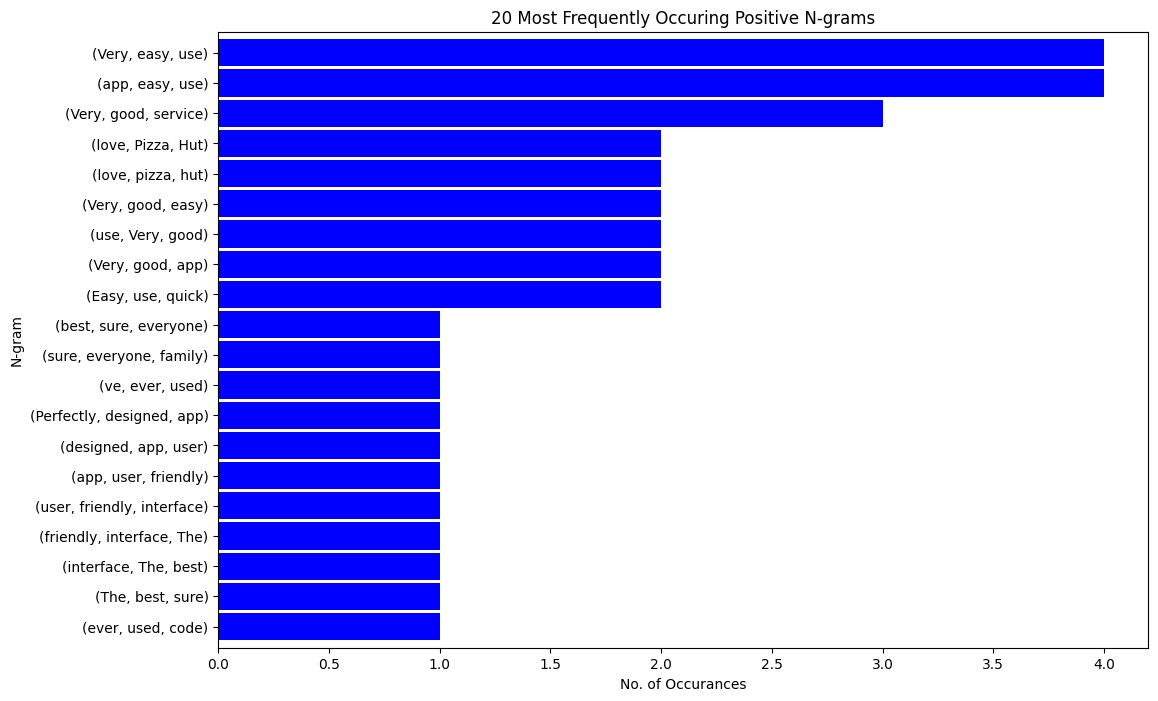

In [ ]:
n_grams_good2.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Positive N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

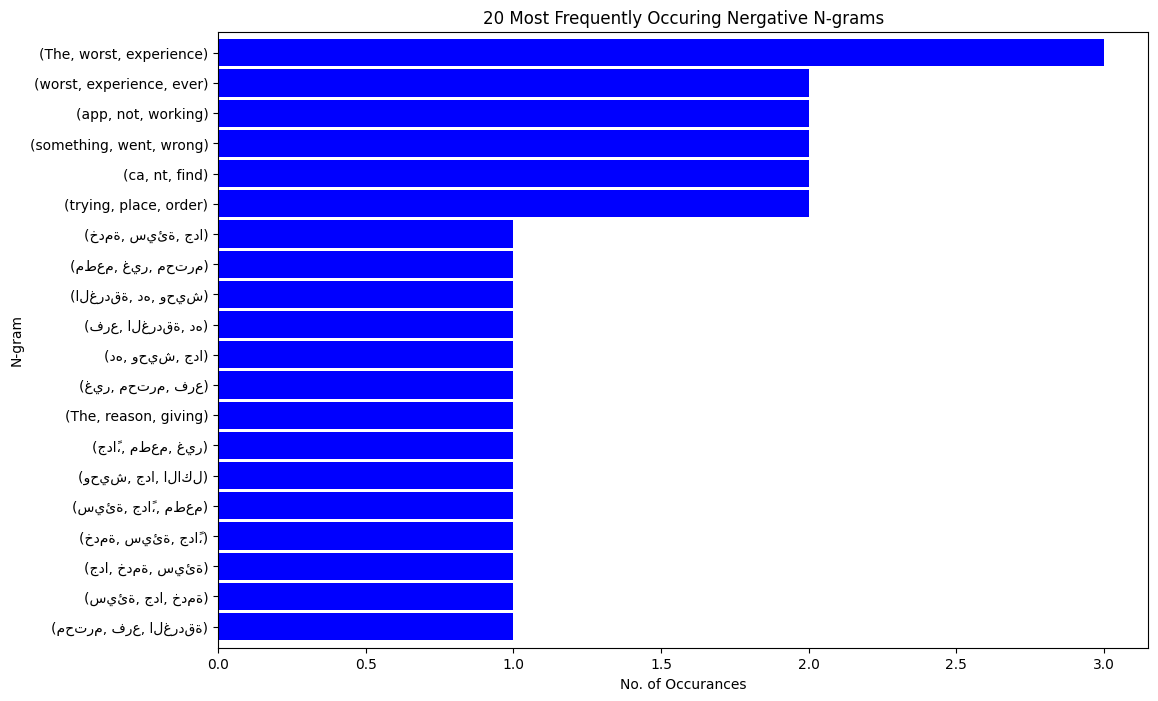

In [ ]:
n_grams_bad2.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Nergative N-grams')
plt.ylabel('N-gram')
plt.xlabel('No. of Occurances')

In [ ]:
import collections

# Step 1: Calculate the frequency of each word in the entire dataset
word_frequency = collections.Counter([word for review in df_egy3['content'] for word in review.split()])

# Step 2: Sort the words based on their frequency
sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

# Step 3: Manually identify keywords related to each aspect
food_quality_keywords = {'food','delicious', 'tasty', 'flavorful', 'yummy', 'satisfying', 'bland', 'tasteless', 'horrible', 'amazing', 'great', 'fresh', 'quality', 'good', 'bad', 'good food', 'good quality', 'bad food', 'bad quality'}
service_keywords = {'fast', 'friendly', 'efficient', 'courteous', 'attentive', 'rude', 'slow', 'excellent', 'helpful', 'quick', 'professional', 'crash'}
ambiance_keywords = {'cozy', 'atmospheric', 'inviting', 'relaxing', 'welcoming', 'comfortable', 'clean', 'modern', 'pleasant', 'quiet', 'spacious'}
price_keywords = {'affordable', 'reasonable', 'value', 'budget-friendly', 'inexpensive', 'expensive', 'cheap', 'pricey', 'cost', 'economical', 'bad price', 'good price', 'good value', 'bad value'}

# Step 4: Define the minimum frequency threshold for each aspect
min_frequency = 1  # Adjust as needed

# Step 5: Filter the most frequent words to obtain keywords related to each aspect
food_quality_keywords_freq = [(word, freq) for word, freq in sorted_words if word in food_quality_keywords and freq >= min_frequency]
service_keywords_freq = [(word, freq) for word, freq in sorted_words if word in service_keywords and freq >= min_frequency]
ambiance_keywords_freq = [(word, freq) for word, freq in sorted_words if word in ambiance_keywords and freq >= min_frequency]
price_keywords_freq = [(word, freq) for word, freq in sorted_words if word in price_keywords and freq >= min_frequency]

# Print the keywords for each aspect
print("Food Quality Keywords:")
print(food_quality_keywords_freq)
print("\nService Keywords:")
print(service_keywords_freq)
print("\nAmbiance Keywords:")
print(ambiance_keywords_freq)
print("\nPrice Keywords:")
print(price_keywords_freq)


NameError: name 'df_egy3' is not defined

         Aspect  Positive Sentiment  Negative Sentiment
0  Food Quality            0.635294            0.364706
1       Service            0.928571            0.071429
2      Ambiance            1.000000            0.000000
3         Price            1.000000            0.000000


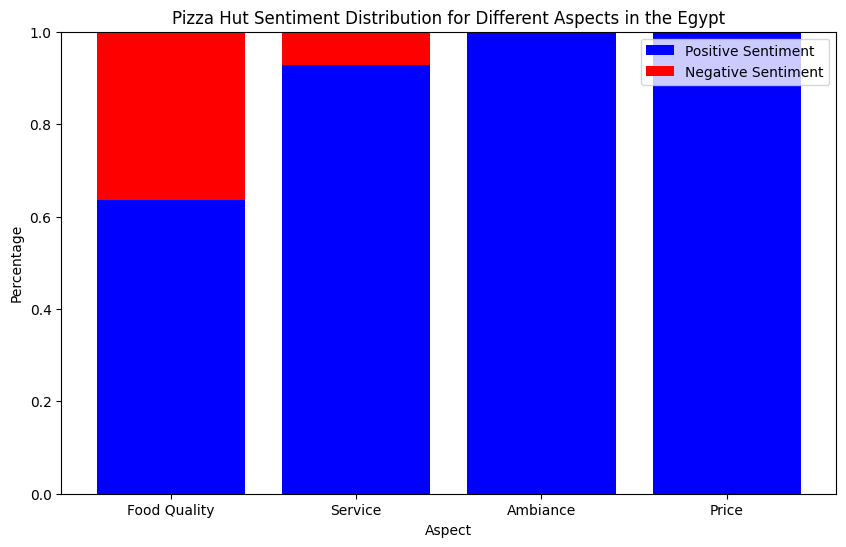

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Positive and negative sentiment words
positive_words = {'good', 'excellent', 'delicious', 'friendly', 'efficient', 'great', 'helpful', 'quick', 'fast', 'value', 'cheap', 'clean', 'friendly', 'professional'}
negative_words = {'bad', 'horrible', 'tasteless', 'rude', 'slow', 'terrible', 'expensive'}

# Function to calculate sentiment distribution for each aspect
def calculate_sentiment_distribution(keywords_freq, aspect):
    positive_sentiment = sum([freq for word, freq in keywords_freq if word in positive_words])
    negative_sentiment = sum([freq for word, freq in keywords_freq if word in negative_words])
    total = positive_sentiment + negative_sentiment

    if total == 0:
        return 0, 0

    positive_percentage = positive_sentiment / total
    negative_percentage = negative_sentiment / total
    return positive_percentage, negative_percentage

# Calculate sentiment distribution for each aspect
food_quality_positive, food_quality_negative = calculate_sentiment_distribution(food_quality_keywords_freq, 'Food Quality')
service_positive, service_negative = calculate_sentiment_distribution(service_keywords_freq, 'Service')
ambiance_positive, ambiance_negative = calculate_sentiment_distribution(ambiance_keywords_freq, 'Ambiance')
price_positive, price_negative = calculate_sentiment_distribution(price_keywords_freq, 'Price')

# Create a DataFrame to store the results
sentiment_df1 = pd.DataFrame({
    'Aspect': ['Food Quality', 'Service', 'Ambiance', 'Price'],
    'Positive Sentiment': [food_quality_positive, service_positive, ambiance_positive, price_positive],
    'Negative Sentiment': [food_quality_negative, service_negative, ambiance_negative, price_negative]
})

# Display the DataFrame
print(sentiment_df1)

# Plot sentiment distribution for all aspects
plt.figure(figsize=(10, 6))
plt.bar(sentiment_df1['Aspect'], sentiment_df1['Positive Sentiment'], color='blue', label='Positive Sentiment')
plt.bar(sentiment_df1['Aspect'], sentiment_df1['Negative Sentiment'], color='red', bottom=sentiment_df1['Positive Sentiment'], label='Negative Sentiment')
plt.xlabel('Aspect')
plt.ylabel('Percentage')
plt.title('Pizza Hut Sentiment Distribution for Different Aspects in the Egypt')
plt.legend()
plt.ylim(0, 1)
plt.show()


In [ ]:
# Calculate the total count of keywords
total_keywords_count = len(food_quality_keywords_freq) + len(service_keywords_freq) + len(ambiance_keywords_freq) + len(price_keywords_freq)

# Calculate the percentage of keywords for each aspect
food_quality_percentage = (len(food_quality_keywords_freq) / total_keywords_count) * 100
service_percentage = (len(service_keywords_freq) / total_keywords_count) * 100
ambiance_percentage = (len(ambiance_keywords_freq) / total_keywords_count) * 100
price_percentage = (len(price_keywords_freq) / total_keywords_count) * 100

# Print the percentage of keywords for each aspect
print("Food Quality Percentage:", food_quality_percentage, "%")
print("Service Percentage:", service_percentage, "%")
print("Ambiance Percentage:", ambiance_percentage, "%")
print("Price Percentage:", price_percentage, "%")


Food Quality Percentage: 45.45454545454545 %
Service Percentage: 40.909090909090914 %
Ambiance Percentage: 4.545454545454546 %
Price Percentage: 9.090909090909092 %


In [ ]:
df_egy2.head(1000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare your data (assuming df_egy has already been preprocessed)
X = df_egy3['content']  # Independent variable
y = df_egy3['Sentiment']  # Dependent variable

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Step 4: Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7627118644067796

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.29      0.44        38
           1       0.75      0.99      0.85        80

    accuracy                           0.76       118
   macro avg       0.83      0.64      0.64       118
weighted avg       0.80      0.76      0.72       118

